# HW5 - Numerical Project
Simulate 100 paths for the diffusions below on [0,1] using the Euler scheme for a discretization of 0.01.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import shift
%matplotlib inline

In [3]:
#Genearte Brownian Paths:

def bm(initial_time, end_time, step):
    
    # Create a list to store the brownian path, B[0]=0
    total_len = int(end_time/step) +1
    B = [initial_time]*total_len
    
    iteration_time = int((total_len-1)/2)
    for i in range(iteration_time):
        N1 = np.random.normal(loc = 0, scale = 1)
        N2 = np.random.normal(loc = 0, scale = 1)
        
        # add one extra point at the end iteration if the total_len is even
        if (i == iteration_time -1) and (2*iteration_time < total_len-1):
            B[2*i+1] = N1 * np.sqrt(step)
            B[2*i+2] = N2 * np.sqrt(step)
            N3 = np.random.normal(loc = 0, scale = 1)
            N4 = np.random.normal(loc = 0, scale = 1)
            B[2*i+3] = N3 * np.sqrt(step)
         
        else:
            B[2*i+1] = N1 * np.sqrt(step)
            B[2*i+2] = N2 * np.sqrt(step)
    
    B = np.array(B).cumsum()
    
    
    time = np.array([step*i for i in range(total_len)])
    
    return [time, B]   

# (a) 
$dS_t = S_tdB_t$,      $S_0 =1$

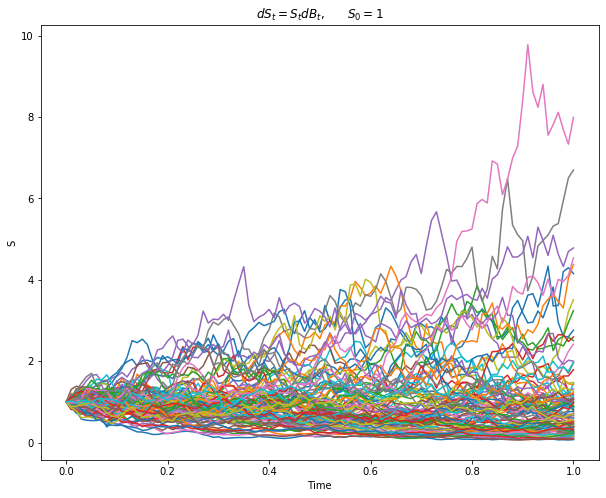

In [4]:
initial_time = 0
end_time = 1 
step = 0.01

plt.figure(figsize=(10,8))
plt.xlabel(xlabel='Time')
plt.ylabel(ylabel='S')
plt.title('$dS_t = S_tdB_t$,      $S_0 =1$')

# Run the simulation
for i in range(100):
    
    # Generate the Brownian path
    [time, B] = bm(initial_time, end_time, step)
    
    # Calculate the Brownian increment
    B_inc = shift(B, -1, cval=B[-1])-B
    
    # Initialize S0 = 1
    S = [1] * len(B)
    
    # Start updating
    for j in range(1,len(B)):
      
        if S[j-1]<0:
            S[j-1] = 0
            
        S[j] = S[j-1] + (S[j-1])*B_inc[j-1]
        
    S = np.array(S)
    plt.plot(time, S)
    

# (b)
$dX_t = -X_td_t + dB_t$,     $X_0 = 1$

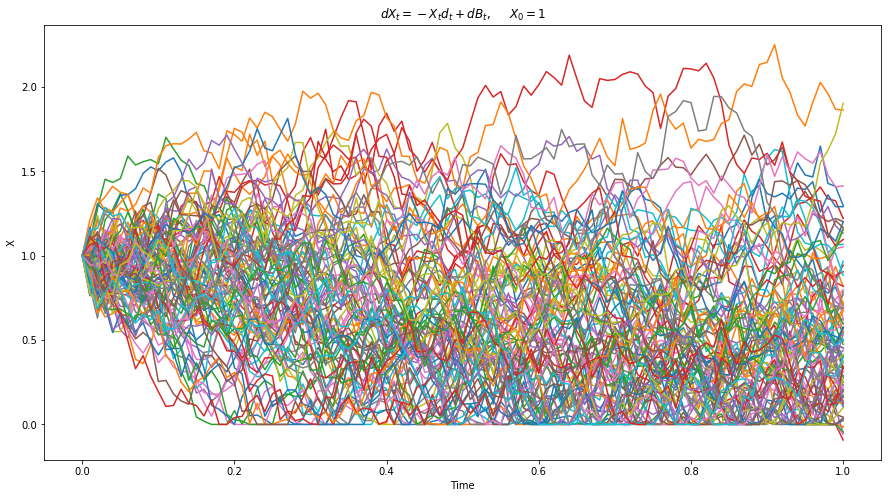

In [4]:

initial_time = 0
end_time = 1 
step = 0.01


plt.figure(figsize=(15,8))
plt.xlabel(xlabel='Time')
plt.ylabel(ylabel='X')
plt.title('$dX_t = -X_td_t + dB_t$,     $X_0 = 1$')

# Run the simulation
for i in range(100):
    
    # Generate the Brownian path
    [time, B] = bm(initial_time, end_time, step)
    
    # Calculate the Brownian increment
    B_inc = shift(B, -1, cval=B[-1])-B
    
    # Initialize X0 = 1
    X = [1] * len(B)
    
    # Start updating
    for j in range(1,len(B)):
        
        if X[j-1]<0:
            X[j-1] = 0
            
        X[j] = X[j-1] - (X[j-1])*step + B_inc[j-1]
        
    X = np.array(X)
    plt.plot(time, X)

# (c)
$dZ_t = 0.5dt + \sqrt{Z_t}dB_t$,    $Z_0 = 5$ 

Discard the path if they become negative here. Out of 100, how many paths are discarded?

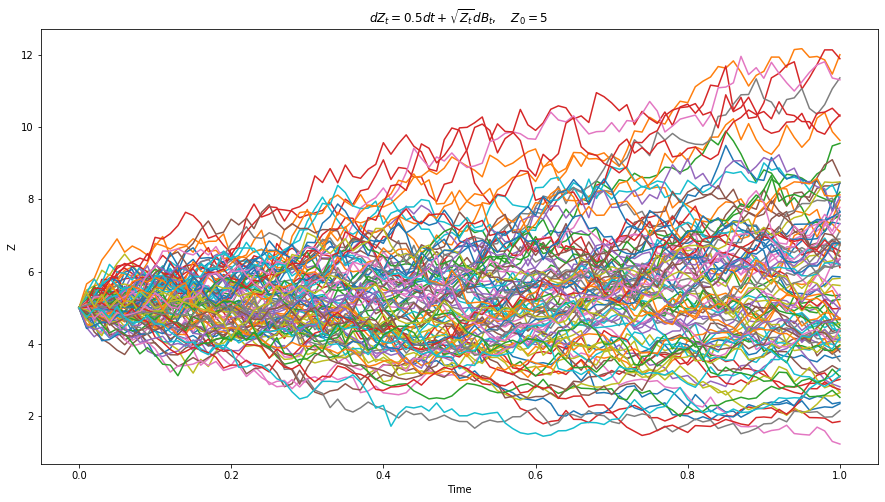

In [6]:

initial_time = 0
end_time = 1 
step = 0.01

plt.figure(figsize=(15,8))
plt.xlabel(xlabel='Time')
plt.ylabel(ylabel='Z')
plt.title('$dZ_t = 0.5dt + \sqrt{Z_t}dB_t$,    $Z_0 = 5$ ')

# Run the simulation
for i in range(100):
    
    # Generate the Brownian path
    [time, B] = bm(initial_time, end_time, step)
    
    # Calculate the Brownian increment
    B_inc = shift(B, -1, cval=B[-1])-B
    
    # Initialize Z0 = 1
    Z = [5] * len(B)
    
    # Start updating
    for j in range(1,len(B)):
        
        if Z[j-1]<0:
            Z[j-1] = 0
            
        Z[j] = Z[j-1] + step/2 + np.sqrt(Z[j-1])*B_inc[j-1]
        
    Z = np.array(Z)
    plt.plot(time, Z)

Out of 100, none of the paths was discarded. 